<a href="https://colab.research.google.com/github/pratham-gupta/Deep-OCR-using-pytesseract/blob/master/tesseract_OCR_RC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Please execute all the cells below.**

In [0]:
#dependencies
%%bash
apt install tesseract-ocr
apt install libtesseract-dev
pip install Pillow
pip install pytesseract

In [0]:
#Required Librarires
import os
import numpy as np
import cv2
import tempfile
from PIL import Image
from google.colab.patches import cv2_imshow
import pytesseract
from google.colab import files
#import re 





In [0]:
def set_image_dpi(file_path):
    """Fucntion: converts input image into 300 dpi image."""
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = min(1, float(1024.0 / length_x))
    size = int(factor * length_x), int(factor * width_y)
    im_resized = im.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False,   suffix='.png')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(300, 300))
    return temp_filename

In [0]:
def image_processing(path):
  """Function: takes image and performs following opertations:
                BGR/RGB to GRAY SCALE,
                resize,
                bitwise,
                dialation,
                morphology,


                 """
  img = cv2.imread(path)
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

  gray = cv2.resize(gray, None, fx=4,fy=4, interpolation=cv2.INTER_CUBIC)
  gray2 = cv2.bitwise_not(gray) 
  kernel = np.ones((2,2),np.uint8)
  gray = cv2.dilate(gray, kernel, iterations=1)
 # gray = cv2.erode(gray, kernel, iterations=1)
  #gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
  gray = cv2.adaptiveThreshold(cv2.medianBlur(gray, 3), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
  gray = cv2.threshold(gray, 0, 255,
  cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

  thresh = cv2.threshold(gray2, 0, 255,
  cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
  #cv2_imshow(thresh)
  thresh = cv2.erode(thresh, kernel,iterations=1) 

  thresh[thresh == 255] = 200
  thresh[thresh == 0] =255
  thresh[thresh==200] = 0

  gray = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)

  #cv2_imshow(gray)

  return thresh,gray

In [0]:
def get_text_from_image(path):
  path = set_image_dpi(path)
  processed_img = image_processing(path)

  result_1 = pytesseract.image_to_string(processed_img[0])
  
  result_1 = result_1.replace('.','').upper()
  result_list = result_1.split('\n')
  words = ['REGN','NO ','REGN NO','REGISTRATION','REG','REG DT','CH','CHASSIS','MFG DT','MFG','MONTH','CH NO','E NO','NAME']


  text = []
  for word in words:
    for sent in result_list:

      if word in sent:
        text.append(sent)

      else:
        pass
  return set(text)



# ***PLease run the cell below and provide path to the image file or enter 'n' to upload a file.***

Provide image path or press N to upload file/content/drive/My Drive/ocr/opencv-text-recognition/images/txt_mudit_b11_1328.jpg
NO HROGP 5988
GS CERTIFICATE OF REGISTRATION OF MOTOR FORM NO 23 RULE 48
CHASSIS NO MAZEYD81500765439 NOOF CYTINDERS 3 |
TYPE OF BODY SALOON MONTH AND YEAR OF MIG 912006
OWNER'S NAME SUBE SINGH
DEALER NAME AND ADDRESS HARISONS AUTOMOBILES,GYROAD,PANIPAT


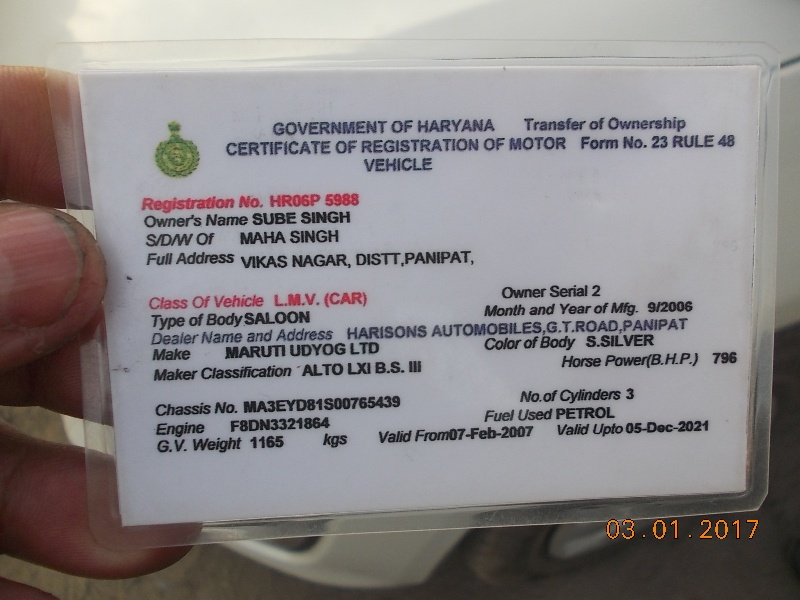

In [0]:
#Upload image or Provide image path(.jpg, .png format).
img_path = input('Provide image path or press N to upload file')

if img_path[0].lower() == 'n' or '':
  try:
    img = files.upload()
    img_path = list(img.keys())[0]
  except IndexError:

    pass


output = get_text_from_image(img_path)

for line in output:
  print(line,sep='\n')

img = cv2.imread(img_path)
cv2_imshow(img)

